#ANN

# imports

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split

# tensorflow, keras
import tensorflow as tf
from tensorflow import keras

In [25]:
tf.__version__ # google colab에 설치된 tensorflow 버전

'2.8.2'

In [26]:
keras.__version__ #google colab에 설치된 keras 버전

'2.8.0'

# iris 데이터 셋

In [27]:
data, target = datasets.load_iris(return_X_y=True)

In [28]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [29]:
target[:5]

array([0, 0, 0, 0, 0])

## petal_length, petal_width 변수만 선택한 이진 분류

In [30]:
X = data[:,2:].copy()
y = (target != 0).astype('int')

In [31]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [32]:
y[:5] ,y [-5:]

(array([0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1]))

In [33]:
np.unique(y, return_counts=True)

(array([0, 1]), array([ 50, 100]))

## SGD Classifier

In [34]:
sgd = SGDClassifier(loss='log', n_jobs=-1,
                    max_iter=10, random_state=42)
# loss='log' 확률을 계산할 수 있도록 바꿔주는 것

In [35]:
sgd.fit(X,y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [36]:
sgd.coef_

array([[9.29310825, 9.5046378 ]])

In [37]:
sgd.intercept_

array([-33.65502003])

In [38]:
pred_prob= sgd.predict_proba(X)
pred_prob[:5]

array([[9.99999993e-01, 7.23930287e-09],
       [9.99999993e-01, 7.23930287e-09],
       [9.99999997e-01, 2.85826298e-09],
       [9.99999982e-01, 1.83354387e-08],
       [9.99999993e-01, 7.23930287e-09]])

In [39]:
pred = sgd.predict(X)
pred[:5]

array([0, 0, 0, 0, 0])

In [40]:
np.mean(y==pred)

1.0

## Neural Network

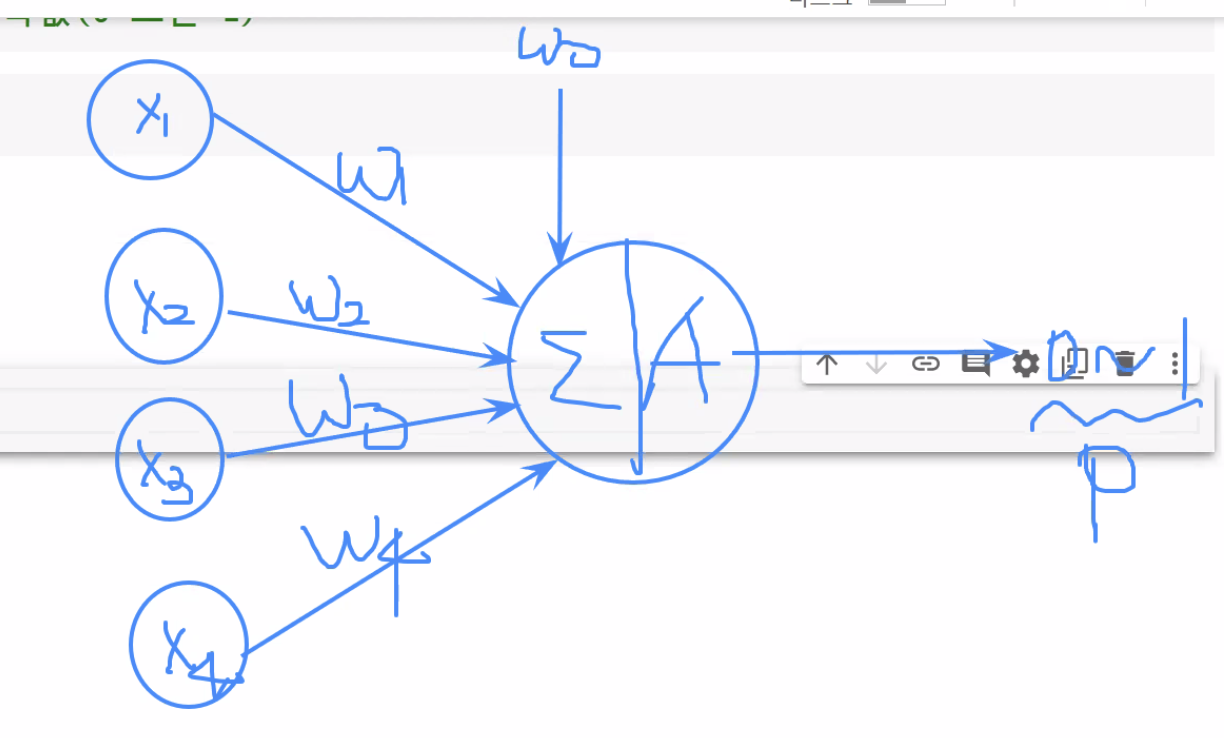

In [41]:
# 신경망 모델 생성
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(2,))],
                         name='iris_binary_single_layer')
# Dense: 독립변수들과 임의의 난수들이 곱해서 뉴런에 들어와서 합쳐지고 액티베이션 함수를 지나서 출력이 나오게끔 하는 것이 덴스레이어


*   `keras.Sequential` 클래스: 신경망 모델(input-hidden-output layer)
*   `keras.layers.Dense` 클래스: Dense 층(한개 이상의 unit(neuron)으로 이루어진 층)
    *   `units` 파라미터: dense layer가 갖는 유닛의 개수
    *   `activation` 파라미터: 활성화 함수 이름
    *   `input_shape` 파라미터: 한개의 유닛으로 입력되는 input data의 shape(튜플)
        *   신경망 모델이 찾아야 하는 파라미터(weights, bias)의 개수를 결정하기 위해서 필요.


In [42]:
# 신경망 모델 요약 정보 : layers, parameters
model.summary()

Model: "iris_binary_single_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 신경망 모델 컴파일: optimizer, loss, metrics 등을 설정
#   optimizer: weight와 bias를 찾기위한 훈련 방법
#   loss: 비용 함수 (이름)
#   metrics: 성능 평가 지표(정확도, R2 score, RMSE 등)
model.compile(optimizer='sgd',
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [44]:
# 신경망 모델 훈련: 훈련 데이터를 반복(epoch)해서 사용하면서,
# loss(손실)은 줄여주고 metric(성능 평가 점수)는 크게 만들어주는 파라미터들(weights, biases)를 찾는 과정.
model.fit(X,y, epochs=10, batch_size=1)
# epoch :반복

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 0.3915 - binary_accuracy: 0.7533
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3396 - binary_accuracy: 0.6933
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3148 - binary_accuracy: 0.7400
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2934 - binary_accuracy: 0.8867
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2741 - binary_accuracy: 0.9333
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2568 - binary_accuracy: 0.9400
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2413 - binary_accuracy: 0.9533
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2274 - binary_accuracy: 0.9867
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2146 - binary_accuracy: 0.9933
Epoch 10/10
150/150 [================

In [45]:
# 신경망 모델의 훈련이 끝난 후 파라미터들(weight, bias)
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.23908134],
        [1.9508486 ]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([-1.4075015], dtype=float32)>]

In [46]:
# 훈련된 모델 평가
model.evaluate(X, y)

5/5 [==============================] - 0s 3ms/step - loss: 0.1970 - binary_accuracy: 0.9933


[0.19703739881515503, 0.9933333396911621]

In [47]:
pred = model.predict(X)
#> 이진 분류(binary class classification)에서 predict() 메서드는 양성 샘플(class=1)이 될 확률을 리턴.
#> (비교) scikit-learn 패키지의 머신 러닝 클래스들의 predict() 메서드는 예측 결과를 리턴함.
pred.shape

(150, 1)

In [48]:
pred[:5]

array([[0.33567724],
       [0.33567724],
       [0.3303669 ],
       [0.3410295 ],
       [0.33567724]], dtype=float32)

In [49]:
# 예측값(0 또는 1)을 계산하기 위해서는 확률 > 0.5 비교해야 함.
pred_label = (pred > 0.5).astype('int').reshape((-1,))
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
np.mean(y == pred_label)  # 정확도: 실젯값과 예측값 비교
# 실젯값과 예측값이 같은 평균=정확도

0.9933333333333333

## 모든 변수(sl,sw,pl,pw)를 사용한 이진 분류

In [51]:
X = data.copy()

### SGD

In [52]:
sgd = SGDClassifier(loss='log',
                    n_jobs=-1,
                    random_state=42,
                    max_iter=10)

In [53]:
sgd.fit(X,y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [54]:
sgd.coef_, sgd.intercept_
# 사이킷런에서는 계수,y절편이지만 신경망에서는 더해지는 가중치(weight)라고 불림 

(array([[ -7.56466569, -26.11029771,  43.43582235,  20.74182528]]),
 array([-14.82209562]))

In [55]:
pred = sgd.predict(X) # 예측값 (0또는 1)

In [56]:
np.mean(y==pred)

1.0

### 신경망

In [57]:
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(4,))])
# 신경망을 어떤 모양으로 만들건지 정의만 한 것

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)
# 신경망의 알고리즘과 회귀&분류인지, 평가점수는 어떻게 할 건지 정해주는 과정이 = compile

In [60]:
# 그 다음 단계가 핏. 학습
model.fit(X,y,
          batch_size=1,
          epochs=10)

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 0.6810 - binary_accuracy: 0.6733
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2806 - binary_accuracy: 0.9533
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1714 - binary_accuracy: 1.0000
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1210 - binary_accuracy: 1.0000
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0944 - binary_accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0767 - binary_accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0651 - binary_accuracy: 1.0000
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0567 - binary_accuracy: 1.0000
Epoch 9/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0499 - binary_accuracy: 1.0000
Epoch 10/10
150/150 [================

In [61]:
# 신경망이 학습 데이터를 훈련하면 가중치들을 찾음.
model.weights
# numpy=array([-0.3002755]) = 가중치(w0)

[<tf.Variable 'dense_9/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.11540143],
        [-1.1845009 ],
        [ 1.1776215 ],
        [ 1.7539653 ]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([-0.24053396], dtype=float32)>]

In [62]:
pred = model.predict(X)
pred[:5]

array([[0.048551  ],
       [0.08627099],
       [0.06346948],
       [0.08898366],
       [0.04384409]], dtype=float32)

In [63]:
pred_label = (pred>0.5).astype('int').reshape((-1,))
pred_label[:5]

array([0, 0, 0, 0, 0])

In [64]:
np.mean(y==pred_label) # 훈련 셋 정확도

1.0

## iris 다중 클래스 분류

In [65]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [66]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### SGD classifier

In [67]:
sgd = SGDClassifier(loss='log',max_iter=10, n_jobs=-1, random_state=42)

In [68]:
sgd.fit(X=data, y=target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [69]:
sgd.coef_ 

array([[   7.32064421,   13.17715959,  -27.57442655,  -12.68911664],
       [  51.85595122, -145.56864647,   40.12103144, -111.8071359 ],
       [-122.62126983, -110.20331528,  189.91857208,  159.89458444]])

In [70]:
sgd.intercept_ #신경망에선 편향을 가리킴.

array([   4.97012943,   87.73116955, -122.93221386])

In [71]:
# 훈련 셋 예측 확률
pred_prob = sgd.predict_proba(X=data)
pred_prob[:5]
# 다중클래스 분류에서는 시그모이드를 사용하지 않고, 소프트맥스함수를 사용한다.
# 확률을 만들어낼때는 이진분류에서는 시그모이드를 사용하면 확률을 계산할 수 있다.

array([[1.00000000e+00, 2.34871875e-54, 0.00000000e+00],
       [1.00000000e+00, 2.99578244e-27, 0.00000000e+00],
       [1.00000000e+00, 3.85472447e-46, 0.00000000e+00],
       [1.00000000e+00, 1.38277811e-38, 0.00000000e+00],
       [1.00000000e+00, 6.26310478e-63, 0.00000000e+00]])

In [72]:
np.argmax(pred_prob, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [73]:
pred_label = sgd.predict(X=data)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
np.mean(target==pred_label)

0.9333333333333333

###NN

In [75]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=3, activation=keras.activations.softmax,
                             input_shape=(4,)))

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
# optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='...'

In [78]:
model.fit(x=data, y=target, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 0s 2ms/step - loss: 0.9304 - sparse_categorical_accuracy: 0.6333
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.6511 - sparse_categorical_accuracy: 0.6533
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5797 - sparse_categorical_accuracy: 0.6533
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5176 - sparse_categorical_accuracy: 0.7400
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4668 - sparse_categorical_accuracy: 0.7733
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4232 - sparse_categorical_accuracy: 0.8133
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4130 - sparse_categorical_accuracy: 0.8333
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3928 - sparse_categorical_accuracy: 0.8533
Epoch 9/10
150/150 [============================

In [79]:
# 신경망 모델이 훈련을 통해서 찾은 가중치 : (n_inputs, n_units) & (n_units,)
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.21066888, -0.08414616, -1.1207403 ],
        [ 0.99878836, -0.62167877, -1.108058  ],
        [-1.9251107 , -0.30973598,  1.0340742 ],
        [-0.5334732 , -0.60563374,  0.28932732]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.14250302,  0.13654302, -0.27904645], dtype=float32)>]

In [80]:
# 다중 클래스 분류 신경망 모델의 predict(): 각 클래스가 될 확률들
pred = model.predict(x=data)

In [81]:
pred[:5]

array([[9.41611409e-01, 5.81110679e-02, 2.77519022e-04],
       [8.80043507e-01, 1.19064279e-01, 8.92214885e-04],
       [9.24418688e-01, 7.50325471e-02, 5.48741315e-04],
       [8.83674026e-01, 1.15044035e-01, 1.28187588e-03],
       [9.50494707e-01, 4.92567867e-02, 2.48539756e-04]], dtype=float32)

In [82]:
pred.shape # 신경망에서 최종 output의 shape

(150, 3)

In [83]:
pred_label = np.argmax(pred, axis=1)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
np.mean(target == pred_label) # 실젯값과 예측값의 정확도

0.9333333333333333

## Fashion MNIST datasets

In [85]:
(X_tr,y_tr), (X_te,y_te) = keras.datasets.fashion_mnist.load_data()

In [86]:
X_tr.shape, y_tr.shape

((60000, 28, 28), (60000,))

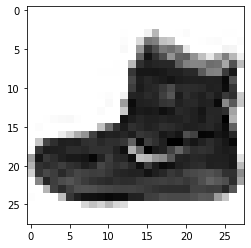

In [87]:
img = X_tr[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [88]:
y_tr[0]

9

In [89]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [90]:
X_te.shape, y_te.shape

((10000, 28, 28), (10000,))

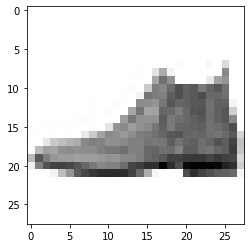

In [91]:
img = X_te[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [92]:
y_te[0]

9

In [93]:
np.unique(y_te, return_counts=True)
# 독립변수 10개

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [94]:
def plot_fashion_mnist(arr, ncols=10):
    n = len(arr)  # arr의 원소의 개수, 샘플 개수.
    nrows = int(np.ceil(n / ncols))  # subplot의 row 개수
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j  # arr에서 샘플의 인덱스
            if nrows == 1 or ncols == 1:  # ax가 1차원 배열인 경우
                if idx < n:
                    ax[idx].imshow(arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:  # ax가 2차원 배열인 경우
                if idx < n:
                    ax[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                ax[i, j].axis('off')
    plt.show()

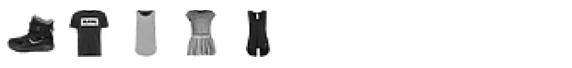

In [95]:
plot_fashion_mnist(X_tr[:5])

### 데이터 셋 전처리:

훈련 셋과 테스트 셋은 0 ~ 255 스케일인데, 0~1 스케일로 변환.

In [96]:
X_tr_sc = X_tr/255
X_te_sc = X_te/255

 훈련 셋을 훈련/검증 셋으로 분리

In [97]:
tr_data , val_data, tr_target, val_target = train_test_split(X_tr_sc, y_tr,
                                                             test_size=0.2,
                                                             random_state=42,
                                                             stratify=y_tr)

### SGD classifier

In [98]:
sgd = SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [99]:
tr_data.shape

(48000, 28, 28)

In [100]:
tr_data = tr_data.reshape((48000,-1)) # (48000,28,28) -> (48000,784)
val_data = val_data.reshape((12000,-1)) # (12000,28,28) -> (12000,784)
print(tr_data.shape, val_data.shape)
# tr_data 는 3차원이므로 2차원으로 reshape 해야함

(48000, 784) (12000, 784)


In [101]:
sgd.fit(tr_data, tr_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [102]:
# 훈련 결과로 찾은 계수들(coefficients)과 절편들(intercept)
sgd.coef_.shape, sgd.intercept_.shape
# coefficients: (10,784) =(n_classes(0~9), n_features(28*28)) , intercept=(n_classes(0~9),)

((10, 784), (10,))

In [103]:
# 훈련 셋 예측 확률
tr_pred_prob = sgd.predict_proba(tr_data)
tr_pred_prob[:5]
# 하나당 10개씩 나오는 확률, ex) 첫번째 샘플이 1이 될 확률, 첫번째 샘플이 2가 될 확률

array([[3.46103829e-03, 1.98675755e-06, 4.82667555e-01, 5.02729471e-05,
        5.48912955e-04, 3.15719188e-12, 5.03987179e-01, 2.65192156e-18,
        9.28305521e-03, 3.96124972e-35],
       [7.55523103e-01, 3.54977754e-05, 3.87606154e-05, 1.08699705e-05,
        5.89136288e-03, 1.79628081e-19, 2.37639589e-01, 9.02758217e-16,
        8.60816116e-04, 2.98418435e-33],
       [7.97566128e-04, 1.45330661e-04, 4.22729884e-04, 9.60294932e-01,
        1.55868192e-06, 2.10671858e-13, 3.83331593e-02, 3.59903550e-06,
        1.12473819e-06, 3.41043524e-27],
       [1.25158255e-02, 1.15572089e-02, 3.29383853e-03, 9.72464894e-01,
        3.91064660e-06, 2.34330697e-08, 1.12412979e-04, 6.58855217e-08,
        5.18206161e-05, 3.69130082e-23],
       [9.55929510e-01, 3.04957677e-07, 2.88578564e-02, 2.67622081e-09,
        3.14834992e-09, 5.39027905e-22, 1.38535303e-02, 3.00496410e-16,
        1.35879227e-03, 6.54101447e-22]])

In [104]:
tr_pred = sgd.predict(tr_data)
tr_pred[:5]
# 첫번째 샘플이 6, 두번째 샘플이 0, 세번째 샘플이 3.

array([6, 0, 3, 3, 0], dtype=uint8)

In [105]:
# 훈련 셋에서의 정확도
sgd.score(tr_data, tr_target)

0.8447291666666666

In [106]:
# 검증 셋에서의 정확도
sgd.score(val_data, val_target)

0.8380833333333333

In [107]:
from sklearn.metrics import classification_report
print(classification_report(tr_target, tr_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      4800
           1       0.98      0.97      0.97      4800
           2       0.65      0.86      0.74      4800
           3       0.94      0.78      0.85      4800
           4       0.80      0.70      0.74      4800
           5       0.94      0.92      0.93      4800
           6       0.68      0.55      0.61      4800
           7       0.89      0.94      0.92      4800
           8       0.93      0.96      0.95      4800
           9       0.96      0.89      0.92      4800

    accuracy                           0.84     48000
   macro avg       0.85      0.84      0.84     48000
weighted avg       0.85      0.84      0.84     48000



## Neural Network

In [108]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=10,
          activation=keras.activations.softmax,
          input_shape=(784,)))
# input_shape = pixel개수

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [110]:
# param = 784+1=785 *10 =7850 (bias 까지 더하기 때문에)

In [111]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [112]:
model.fit(tr_data,tr_target, epochs=10)
# target은 레이블
# batch_size=None일 때, batch_size의 기본값은 32
# -> 한번의 epoch에서 반복하는 횟수는 48000/32 = 1500

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8735 - sparse_categorical_accuracy: 0.7227
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6185 - sparse_categorical_accuracy: 0.7989
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5645 - sparse_categorical_accuracy: 0.8163
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5358 - sparse_categorical_accuracy: 0.8228
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5164 - sparse_categorical_accuracy: 0.8281
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5027 - sparse_categorical_accuracy: 0.8324
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4922 - sparse_categorical_accuracy: 0.8358
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4831 - sparse_categorical_accuracy: 0.8375
Epoch 9/10
1500/1500 [==========

In [113]:
model.weights[0].shape

TensorShape([784, 10])

In [114]:
model.weights[1].shape

TensorShape([10])

In [115]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4664 - sparse_categorical_accuracy: 0.8425


[0.46636492013931274, 0.8425208330154419]

In [116]:
model.evaluate(val_data, val_target)
# 검증셋 val_data 12000/ batch size 32 = 375

375/375 [==============================] - 1s 2ms/step - loss: 0.4573 - sparse_categorical_accuracy: 0.8441


[0.4573027491569519, 0.844083309173584]

## DNN (Deep Neural Network) 심층 신경망

Deep learing: DNN을 훈련시키는 머신 러닝 학습 방법.

layer를 2개 이상 연결하는 신경망을 만들 경우:
*   첫번째 layer에서만 input_shape을 지정하면 됨.
    *   두번째 layer부터는 그 이전 layer의 출력의 개수(unit의 개수)가 input_shape이 됨.
*   마지막 layer(출력층)를 제외한 중간 layer들의 units, activation 파라미터는 훈련을 통해서 최적의 값을 찾아야 하는 하이퍼 파라미터.
*   출력층의 units, activation 파라미터는 문제에 따라서 결정됨.
    *   이진 분류: `units=1`, `activation='sigmoid'`
    *   다중 클래스 분류: `units=n_classes`, `activation='softmax'`

In [117]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100,
                             activation=keras.activations.sigmoid,
                             input_shape=(784,)))
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
model.summary()
# 첫 번째 layer에서만 input_shape을 지정하면 됨.
# 두 번째 layer부터는 그 이전 layer의 출력의 개수가 unit과 같아야 하며, 그 출력의 개수가 input_shape이 됨.
# softmax로 써야하는 이유가 마지막 출력은 1이 되어야 하므로

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [119]:
model.fit(tr_data,tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3466 - sparse_categorical_accuracy: 0.6581
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8314 - sparse_categorical_accuracy: 0.7451
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7077 - sparse_categorical_accuracy: 0.7639
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6457 - sparse_categorical_accuracy: 0.7788
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6057 - sparse_categorical_accuracy: 0.7917
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5760 - sparse_categorical_accuracy: 0.8013
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5538 - sparse_categorical_accuracy: 0.8098
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5359 - sparse_categorical_accuracy: 0.8156
Epoch 9/10
1500/1500 [==========

## Activation Funcion(활성화 함수)

활성화 함수를 사용하는 이유:

1. 출력층에서 출력값을 특정 값(예: 0, 1) 또는 특정 값의 범위(예: 0 ~ 1)로 제한하기 위해서
2. 여러 층을 쌓는 다층 신경망(multi-layer neural netwrok, deep neural network)에서 **비선형 함수**를 활성화 함수로 사용하지 않으면 단일 신경망과 동일해지기 때문에.

* 지수함수의 모습

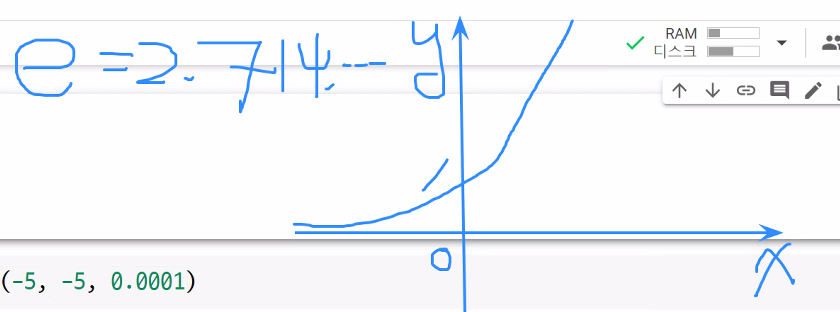

## sigmoid(logistic) 함수

$
\sigma (x) = \dfrac{1}{1 + \exp(-x)}
$

In [120]:
xvals = np.arange(-5,5,0.0001)

In [121]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

# exp = 지수함수

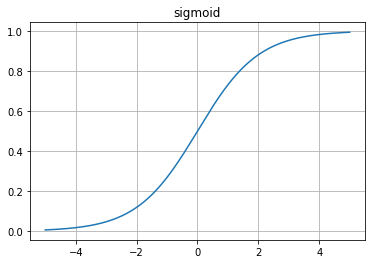

In [122]:
yvals = sigmoid(xvals)
plt.plot(xvals,yvals)
plt.grid()
plt.title('sigmoid')
plt.show()
# 0과 1 사이 함수 = 시그모이드함수 = 로짓함수

## Hybolic tangent

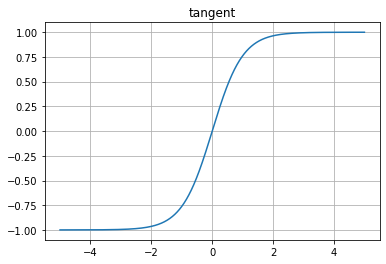

In [123]:
yvals = np.tanh(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('tangent')
plt.show()

## ReLU(Rectified Linear Unit)

$
\text{ReLU} (x) = 
\begin{cases}
    x & \text{for } x \ge 0 \\
    0 & \text{otherwise}
\end{cases}
$

In [124]:
def relu(x):
    return np.maximum(x,0)

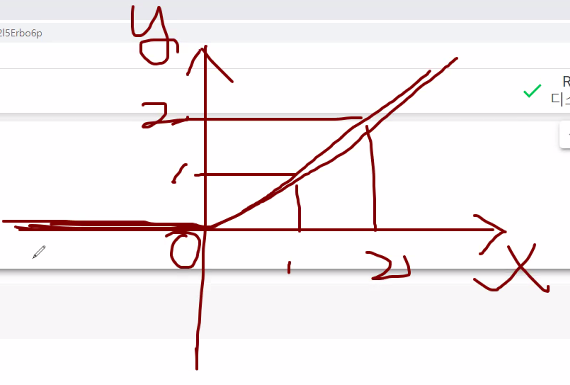

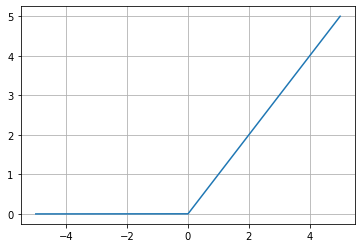

In [125]:
yvals = relu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.show()
# 0보다 작은값은 0임. 항상 기울기가 1이므로 기울기소실문제 해결

## Leaky ReLU

$
\text{LeakyReLU} (x, \alpha) = 
\begin{cases}
    x & \text{for } x \ge 0 \\
    \alpha x & \text{otherwise}
\end{cases}
$

In [126]:
def leaky_relu(x, alpha=0.01):
    return np.maximum(x, alpha * x)

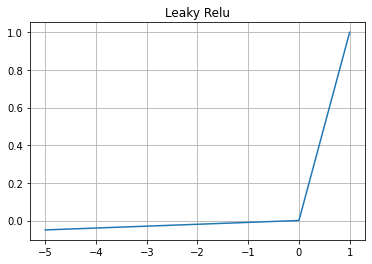

In [127]:
xvals = np.arange(-5,2)
yvals = leaky_relu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('Leaky Relu')
plt.show()
# alpha = 0.0 기본값은 그냥 Relu함수가 되는거고 , 알파값을 조정하면 Leaky Relu함수가 된다.

## ELU(Exponential Linear Unit)

$
\text{ELU} (x, \alpha) =
\begin{cases}
    x & \text{for } x \ge 0 \\
    \alpha (\exp(x) - 1) & \text{otherwise}
\end{cases}
$

In [128]:
def elu(x, alpha=1):
    return np.maximum(x,alpha * (np.exp(x)-1))

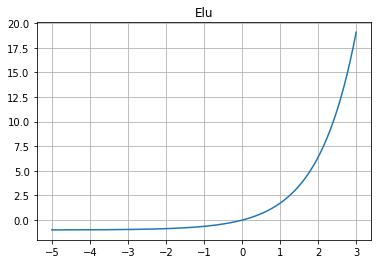

In [129]:
xvals = np.arange(-5,3,0.001)
yvals = elu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('Elu')
plt.show()

Activation 함수 적용: Elu ->Leaky Relu -> Relu -> sigmoid

## MNIST dataset

In [130]:
(X_tr, y_tr),(X_te,y_te) = keras.datasets.fashion_mnist.load_data()

In [131]:
X_tr.shape, X_te.shape # 데이터 - > 3차원 배열(이미지 갯수, 이미지 세로길이, 이미지 가로길이)

((60000, 28, 28), (10000, 28, 28))

In [132]:
# 0 ~ 255 스케일ㅇ르 0~1 스케일로 변환
X_tr_sc = X_tr /255
X_te_sc = X_te / 255

In [133]:
tr_data, val_data, tr_target, val_target = train_test_split(X_tr_sc, y_tr,
                                                            test_size=0.2,
                                                            random_state=42,
                                                            stratify=y_tr)

In [134]:
tr_data.shape, val_data.shape

((48000, 28, 28), (12000, 28, 28))

## 첫번째 layer 활성화 함수 : Elu , epoch= 100

* 강사님 코드

In [135]:
model = keras.Sequential()
# Flatten = (28,28) 모양의 2차원 배열을 (28*28,) 모양의 1차원 배열로 변환하는 레이어
model.add(keras.layers.Flatten(input_shape=(28,28))) #reshape만 해주는 함수
# hidden layer(은닉층)
model.add(keras.layers.Dense(units=100,
                             activation=keras.activations.elu))
# output layer(출력층)
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
# 모델 요약 정보 출력
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [137]:
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7570 - sparse_categorical_accuracy: 0.7509
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5315 - sparse_categorical_accuracy: 0.8173
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4877 - sparse_categorical_accuracy: 0.8305
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4643 - sparse_categorical_accuracy: 0.8393
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4481 - sparse_categorical_accuracy: 0.8437


In [138]:
model.evaluate(tr_data, tr_target)
# evaluate 두번째에 있는것이 정확도, 첫번째는 손실함수

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4361 - sparse_categorical_accuracy: 0.8476


[0.43610358238220215, 0.8476041555404663]

In [139]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4303 - sparse_categorical_accuracy: 0.8511


[0.43027928471565247, 0.8510833382606506]

* 내 코드

In [140]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100,
                             activation=keras.activations.elu,
                             input_shape=(784,)))
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
model.summary()
# 케라스는 파이썬으로 작성된 오픈 소스 신경망 라이브러리이다.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
# 손실함수 : 최솟값으로 향하는 함수이며, 손실이 제일 적게 나는 함수를 찾는 과정
# 분류에서는 crossentropy(무질서)이며 회귀에서는 mse로 손실함수를 찾는다.

In [143]:
# model.fit(tr_data,tr_target, epochs=10)
# random_state는 신경망에서 먹히지 않는다.
# 100개 했을 때 0.9242% 최종

## 첫번째 layer 활성화 함수: Leaky Relu 

* 강사님코드

In [144]:
model = keras.Sequential()
# Flatten layer
model.add(keras.layers.Flatten(input_shape=(28,28))) #이미지 가로 세로 길이만 주면 된다.
# Hidden layer
model.add(keras.layers.Dense(units=100))
# Leaky layer (activation) layer
model.add(keras.layers.LeakyReLU())
# output layer
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [146]:
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7951 - sparse_categorical_accuracy: 0.7441
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5432 - sparse_categorical_accuracy: 0.8150
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4968 - sparse_categorical_accuracy: 0.8281
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4732 - sparse_categorical_accuracy: 0.8365
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4570 - sparse_categorical_accuracy: 0.8418


In [147]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.4493 - sparse_categorical_accuracy: 0.8446


[0.44930532574653625, 0.8445624709129333]

In [148]:
model.evaluate(val_data, val_target)
# epochs를 늘려야한다.

375/375 [==============================] - 1s 2ms/step - loss: 0.4417 - sparse_categorical_accuracy: 0.8489


[0.4417414963245392, 0.8489166498184204]

* 내 코드

In [149]:
from keras.layers import LeakyReLU
model = keras.Sequential([
                        keras.layers.Dense(units=100,
                                           activation=LeakyReLU(alpha=0.1),
                                           input_shape=(784,)),
                        keras.layers.Dense(units=10, 
                                           activation=keras.activations.softmax)])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [150]:
# model = keras.Sequential([
#                         keras.layers.Dense(units=100,
#                                            activation=keras.layers.LeakyReLU(alpha=0.01),
#                                            input_shape=(784,)),
# 적용가능!

In [151]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [165]:
# model.fit(tr_data,tr_target, epochs=10)

# Optimizers

손실(비용, 목적)함수를 최적화하는 알고리즘.

* SGD -> Momentum (속도 증가) -> Nesterov (가속도 증가)
* 적응형 학습율(adaptive learning rate): RMSprop, Adam(Adaptive Momentum), Nadam,AdaGrad,...

In [153]:
# Flatten -> Hidden(100, ELU) -> output(10, softmax)
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(units=100,
                                 activation=keras.activations.elu))
    model.add(keras.layers.Dense(units=10,
                                 activation=keras.activations.softmax))
    return model

In [154]:
model = build_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## RMSprop 사용

In [155]:
# RMSProb 등 생성자를 주는 경우에는 파라미터 값을 조정가능하다
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
model.fit(tr_data, tr_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5298 - sparse_categorical_accuracy: 0.8110
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3976 - sparse_categorical_accuracy: 0.8563
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3606 - sparse_categorical_accuracy: 0.8695
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3354 - sparse_categorical_accuracy: 0.8769
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3198 - sparse_categorical_accuracy: 0.8828


In [156]:
model.evaluate(tr_data,tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3156 - sparse_categorical_accuracy: 0.8839


[0.31563451886177063, 0.8839374780654907]

In [157]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3516 - sparse_categorical_accuracy: 0.8750


[0.3515677750110626, 0.875]

## Adam

In [158]:
model = build_model() #여기서 모델을 새로 만듬.
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [159]:
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5155 - sparse_categorical_accuracy: 0.8166
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3933 - sparse_categorical_accuracy: 0.8567
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3535 - sparse_categorical_accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3301 - sparse_categorical_accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3086 - sparse_categorical_accuracy: 0.8856


In [160]:
model.evaluate(tr_data,tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.8922


[0.2982705235481262, 0.8922083377838135]

In [161]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.8803


[0.33867162466049194, 0.8803333044052124]

## 훈련 epoch 횟수에 따른 평가(손실,정확도)

In [162]:
model = build_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [167]:
history = model.fit(x=tr_data, y= tr_target,epochs=20,
                    validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5309 - sparse_categorical_accuracy: 0.8104 - val_loss: 0.4177 - val_sparse_categorical_accuracy: 0.8501
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3988 - sparse_categorical_accuracy: 0.8545 - val_loss: 0.3647 - val_sparse_categorical_accuracy: 0.8703
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3603 - sparse_categorical_accuracy: 0.8684 - val_loss: 0.3453 - val_sparse_categorical_accuracy: 0.8760
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3375 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.3499 - val_sparse_categorical_accuracy: 0.8732
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3195 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.3462 - val_sparse_categorical_accuracy: 0.8770
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3058 - spars

In [168]:
type(history)

keras.callbacks.History

In [169]:
type(history.history) # History 객체의 history 속성(property)

dict

In [171]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

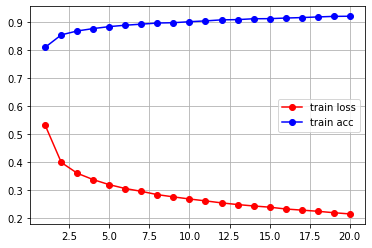

In [175]:
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 크로스 엔트로피
train_loss = history.history['loss']
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 정확도
train_acc = history.history['sparse_categorical_accuracy']

epochs = np.arange(1,21)
plt.plot(epochs, train_loss, 'ro-', label='train loss')
plt.plot(epochs, train_acc, 'bo-', label='train acc')
plt.grid()
plt.legend()
plt.show()
# epoch를 늘려줄수록 정확도가 높아지고 손실함수가 적어짐. = 학습곡선

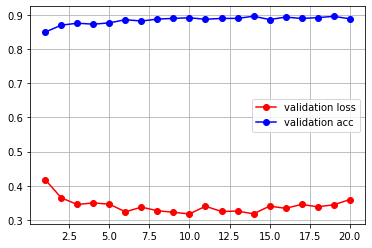

In [178]:
# 신경망 모델이 epoch 마다 계산한 검증 셋에서의 크로스 엔트로피(손실)
val_loss = history.history['val_loss']
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 정확도
val_acc = history.history['val_sparse_categorical_accuracy']

epochs = np.arange(1,21)
plt.plot(epochs, val_loss, 'ro-', label='validation loss')
plt.plot(epochs, val_acc, 'bo-', label='validation acc')
plt.grid()
plt.legend()
plt.show()
# 정확도가 떨어지면 손실은 올라가고, 정확도가 올라가면 손실은 내려가는 모습을 보임. 검증셋의 학습 곡선

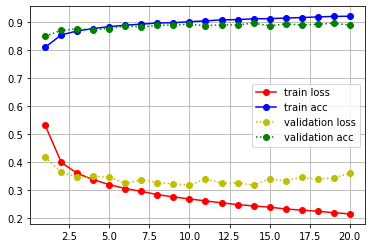

In [179]:
plt.plot(epochs, train_loss, 'ro-', label='train loss')
plt.plot(epochs, train_acc, 'bo-', label='train acc')

plt.plot(epochs, val_loss, 'yo:', label='validation loss')
plt.plot(epochs, val_acc, 'go:', label='validation acc')

plt.grid()
plt.legend()
plt.show()

## 규제: Dropout

In [199]:
model= build_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
result_non_dropout= model.fit(x=tr_data, y=tr_target, epochs=20,
                              validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5159 - sparse_categorical_accuracy: 0.8183 - val_loss: 0.4030 - val_sparse_categorical_accuracy: 0.8554
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3912 - sparse_categorical_accuracy: 0.8565 - val_loss: 0.3638 - val_sparse_categorical_accuracy: 0.8707
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3541 - sparse_categorical_accuracy: 0.8701 - val_loss: 0.3545 - val_sparse_categorical_accuracy: 0.8728
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3274 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.3303 - val_sparse_categorical_accuracy: 0.8802
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3080 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.3221 - val_sparse_categorical_accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2922 - spars

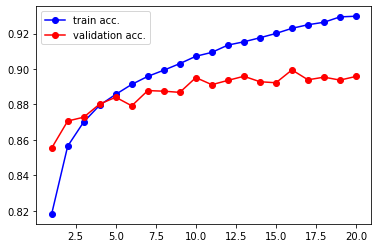

In [209]:
# epoch 변화에 따른 정확도 곡선
train_acc = result_non_dropout.history['sparse_categorical_accuracy']
val_acc = result_non_dropout.history['val_sparse_categorical_accuracy']

plt.plot(epochs, train_acc, 'bo-', label='train acc.')
plt.plot(epochs, val_acc, 'ro-', label='validation acc.')
plt.legend()
plt.show()

In [200]:
def build_dropout_model():
    model = keras.Sequential()
    # flatten layer
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # hidden layer
    model.add(keras.layers.Dense(units=100,
                                 activation=keras.activations.elu))
    # dropout layer
    model.add(keras.layers.Dropout(0.3))
    # output layer
    model.add(keras.layers.Dense(units=10,
                                 activation=keras.activations.softmax))
    return model

In [201]:
model = build_dropout_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
result_dropout = model.fit(x=tr_data, y=tr_target, epochs=20,
                           validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5767 - sparse_categorical_accuracy: 0.7975 - val_loss: 0.4360 - val_sparse_categorical_accuracy: 0.8428
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4477 - sparse_categorical_accuracy: 0.8393 - val_loss: 0.3870 - val_sparse_categorical_accuracy: 0.8624
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4171 - sparse_categorical_accuracy: 0.8488 - val_loss: 0.3650 - val_sparse_categorical_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3950 - sparse_categorical_accuracy: 0.8561 - val_loss: 0.3536 - val_sparse_categorical_accuracy: 0.8738
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3800 - sparse_categorical_accuracy: 0.8620 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8671
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3673 - spars

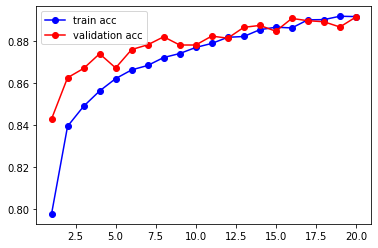

In [203]:
train_acc = result_dropout.history['sparse_categorical_accuracy']
val_acc = result_dropout.history['val_sparse_categorical_accuracy']

plt.plot(epochs, train_acc, 'bo-', label='train acc')
plt.plot(epochs, val_acc, 'ro-', label='validation acc')
plt.legend()
plt.show()

In [ ]:
model.weights

# 훈련된 모델 저장과 복원

Colab 세션에 저장하고 세션이 만료되면 저장된 파일은 삭제됨.

구글 마운트에 저장해야함.

In [205]:
# 훈련된 모델의 파라미터들만 저장
model.save_weights('dropout_model_weights.h5')

In [208]:
# 훈련된 모델을 저장
model.save('dropout_model.h5')

* 파라미터만 저장된 파일에서 모델을 복원하려면, 저장 당시의 모델과 동일한 모델을 먼저 생성한 후 파라미터를 Load하면 됨.

In [211]:
model2 = build_dropout_model() # 파라미터 저장과 동일한 모델 생성
model2.load_weights('dropout_model_weights.h5') # 생성된 모델에서 파라미터들을 로드.

파라미터들만 로드한 경우에는 optimizer, loss, metrics 등이 compile되지 않은 상태이기 때문에
evaluate를 호출할 수는 없음. 

하지만 훈련된 파라미터가 있기 때문에 predict는 가능함.

In [212]:
pred_prob = model2.predict(x=val_data) # 각 레이블이 될 확률
pred_label = np.argmax(pred_prob, axis=1) # 예측 값
np.mean(val_target == pred_label) # 정확도

0.8913333333333333

* 저장된 모델을 로드하는 경우:

In [214]:
model3 = keras.models.load_model('dropout_model.h5')

In [215]:
model3.evaluate(x=val_data, y=val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8913


[0.30357539653778076, 0.8913333415985107]

# Early Stopping(조기 종료) Callback

In [217]:
model = build_dropout_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
result = model.fit(x=tr_data, y=tr_target, epochs=100, 
                   callbacks=[checkpoint_cb, early_stop_cb],
                   validation_data=(val_data, val_target)) 

Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5749 - sparse_categorical_accuracy: 0.7974 - val_loss: 0.4257 - val_sparse_categorical_accuracy: 0.8484
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4533 - sparse_categorical_accuracy: 0.8364 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8584
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4132 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.3854 - val_sparse_categorical_accuracy: 0.8584
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3946 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.3747 - val_sparse_categorical_accuracy: 0.8628
Epoch 5/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3801 - sparse_categorical_accuracy: 0.8600 - val_loss: 0.3490 - val_sparse_categorical_accuracy: 0.8738
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3678 -

In [ ]:
train_loss = result.history